In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from adjustText import adjust_text
import matplotlib.patheffects as pe
import pandas as pd
import os
os.chdir(r'E:\AAA_Labwork\capenterlab_mtb')

In [178]:
#113 got from biomart
txid = pd.read_csv('mart_export.txt',sep = '\t')
del txid['Transcript stable ID']
txid = txid.drop_duplicates()

txid.index = txid['Gene stable ID']
txid['Gene name and ID'] = txid['Gene name'].astype(str).map(str) +'_'+ txid.index.astype(str).map(str)
txid['Gene name and ID'][txid['Gene name'].isna()] = txid.index.astype(str)[txid['Gene name'].isna()]
txid['Name'] = txid['Gene name']
txid['Name'][pd.DataFrame(txid['Gene name']).duplicated()] = txid['Gene name and ID'][pd.DataFrame(txid['Gene name']).duplicated()] 
id_table = pd.DataFrame(txid['Name']).T
id_dict = id_table.to_dict(orient = 'records')[0]#index = False)
# # ylimmax = [80,60,100,100,130]

In [180]:
df = pd.read_csv(f"state_emb_4states_overexpression.csv",index_col= 3)

In [181]:
data = df.rename(index = id_dict)
data = data[data['Shift_to_goal_end'] > 0 ]
data = data[data['N_Detections']>50]
# Calculate -log10(FDR)
data['Mtb-specific -log10_FDR'] = -np.log10(data['Goal_end_FDR'])
data['Bystander -log10_FDR'] = -np.log10(data['Alt_end_FDR_more_expanded_bystander'])
data['Mtb-specific 2 -log10_FDR'] = -np.log10(data['Alt_end_FDR_more_expanded_mtb_specific_2'])

c:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10

c:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10

c:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
C:\Users\16220\AppData\Roaming\Python\Python39\site-packages\matplotlib\transforms.py:371: RuntimeWarning:

invalid value encountered in double_scalars

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and po

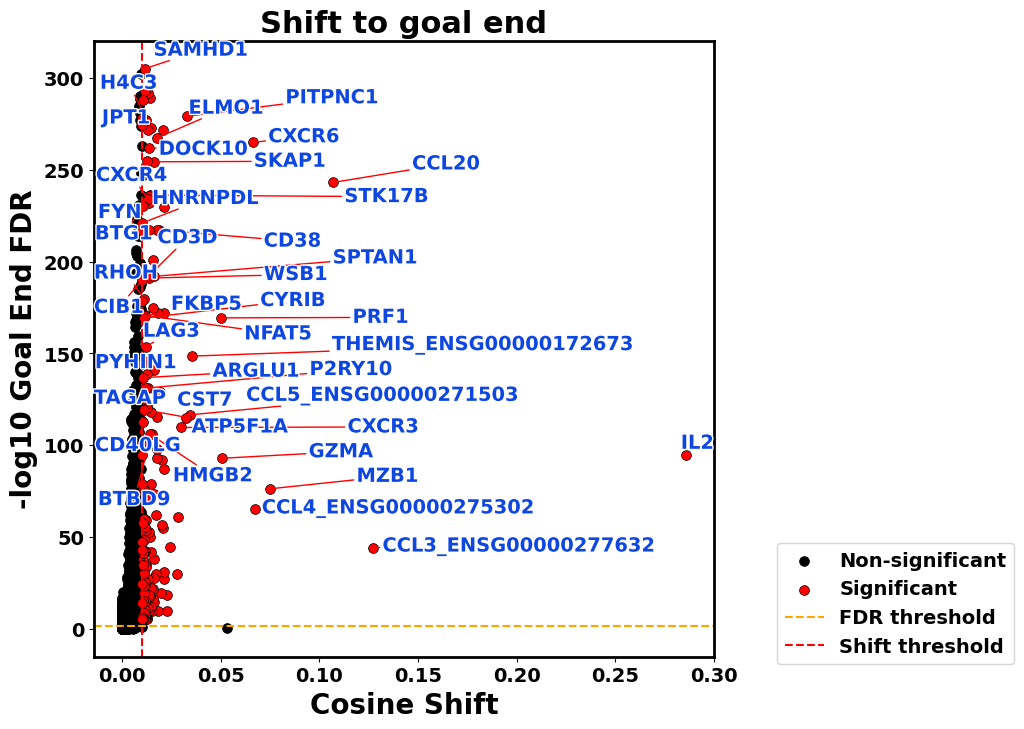

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

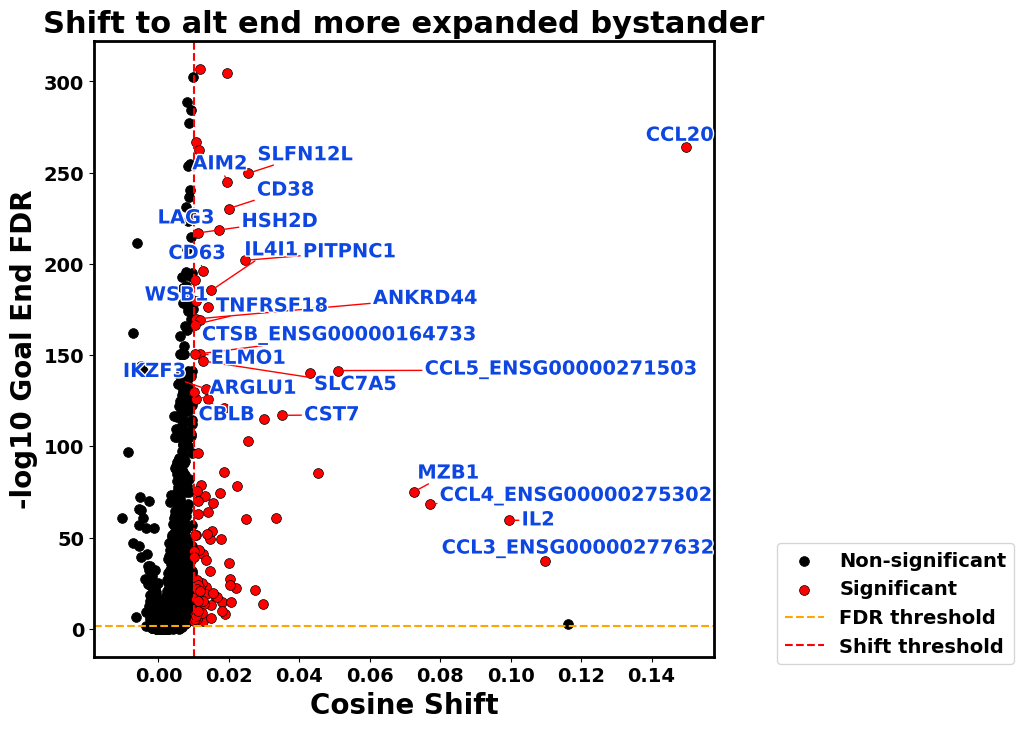

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

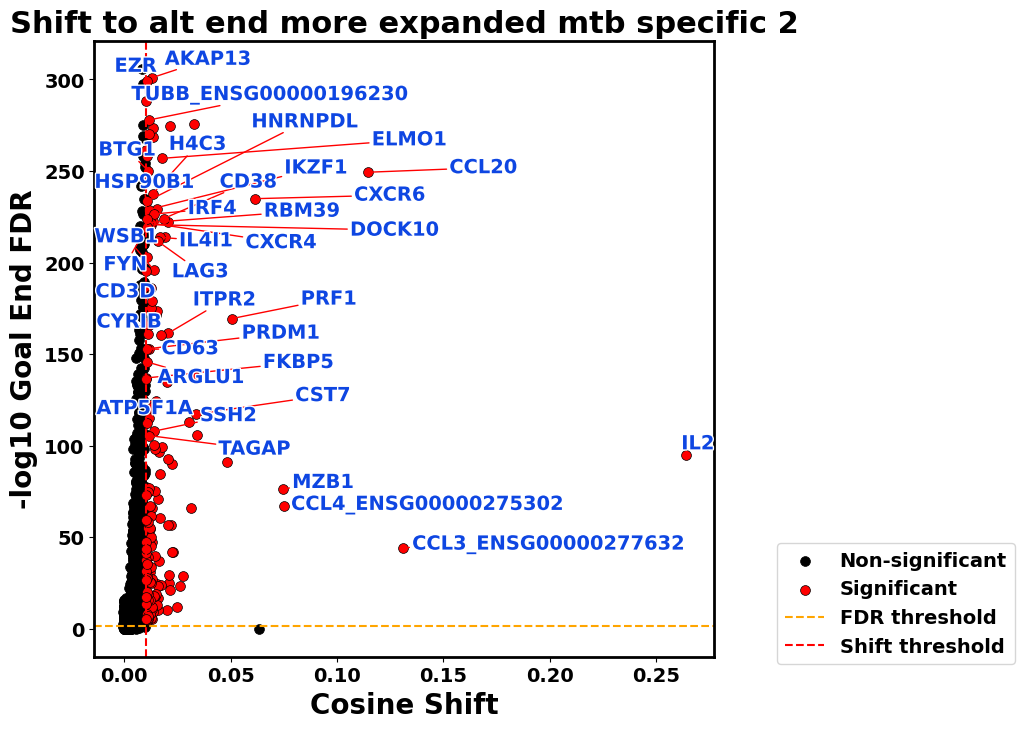

In [190]:
fdrs = ['Mtb-specific -log10_FDR','Bystander -log10_FDR','Mtb-specific 2 -log10_FDR']
for j, colname in enumerate(['Shift_to_goal_end','Shift_to_alt_end_more_expanded_bystander','Shift_to_alt_end_more_expanded_mtb_specific_2']):
        sig_data = data[(data['Sig'] == 1) & (data[colname] >= 0.01)]
        non_sig_data = data[(data['Sig'] == 0) | (data[colname] < 0.01)]

        important_list = sig_data.index[((sig_data[fdrs[j]] > 100) | (sig_data[colname] > 0.05)) & ~sig_data.index.str.startswith('RP') & ~sig_data.index.str.startswith('MT')& ~sig_data.index.str.startswith('ENSG')]

        # Plot settings
        plt.figure(figsize=(8, 8))
        plt.rcParams.update({'font.size': 14, 'font.weight': 'bold', 'axes.linewidth': 2})

        # Scatter plot for significant and non-significant points
        plt.scatter(non_sig_data[colname], non_sig_data[fdrs[j]], 
                    color='black', s=50, edgecolors='black', linewidths=0.5, label='Non-significant')

        plt.scatter(sig_data[colname], sig_data[fdrs[j]], 
                    color='red', s=50, edgecolors='black', linewidths=0.5, label='Significant')
        texts = []
        for i, row in sig_data.iterrows():
            if i in important_list:
                if sig_data[colname][i]<0.05:
                    if np.random.random() >0.5:
                        texts.append(plt.text(row[colname], row[fdrs[j]], 
                                            i, size = 14, color= '#0E46E2', weight = 'bold', #bbox=dict(boxstyle="Square,pad=0.1", fc="white", ec="b", lw=2, alpha = 0.8),
                                            path_effects=[pe.withStroke(linewidth=2, foreground="white")]))
                else:
                    texts.append(plt.text(row[colname], row[fdrs[j]], 
                                        i, size = 14, color= '#0E46E2', weight = 'bold', #bbox=dict(boxstyle="Square,pad=0.1", fc="white", ec="b", lw=2, alpha = 0.8),
                                        path_effects=[pe.withStroke(linewidth=2, foreground="white")]))                    

        # plt.ylim([-0.01,ylimmax[j]])
        plt.axhline(y=-np.log10(0.05), color="orange", linestyle="--", label='FDR threshold')
        plt.axvline(x=0.01, color="red", linestyle="--", label='Shift threshold')
        plt.legend(bbox_to_anchor=(1.5, 0.2))

        # Adjust text to avoid overlap
        adjust_text(texts, force_static  = 0.3, force_text = 0.4, max_move  = 100, arrowprops=dict(arrowstyle='-', color='red')) #force_static  = 0.4,

        #plt.xlim([-4.5,4.5])
        # Axes labels and title
        plt.xlabel("Cosine Shift", fontsize=20, fontweight='bold')
        plt.ylabel("-log10 Goal End FDR", fontsize=20, fontweight='bold')
        plt.title(colname.replace('_',' '), fontsize=22 , fontweight='bold')
        plt.show()
        # plt.savefig(colname+'expand.png')

In [201]:
import plotly.express as px
import plotly.graph_objects as go
import math

sig_data = data[(data['Sig'] == 1)]
# assume `df` is your DataFrame with exactly three columns
df = sig_data[['Shift_to_goal_end','Shift_to_alt_end_more_expanded_bystander','Shift_to_alt_end_more_expanded_mtb_specific_2']]
df.columns = ['Expanded Mtb-specific (Goal)','Expanded Bystander (Alt1)', 'Expanded Mtb-specific (Alt2)']
df[df<0] = 0 # we only care those who make the embeddings more similar, not equally or less similar
df = df.loc[(df>0.01).any(axis = 1)]
fractions = df.div(df.sum(axis = 1), axis = 0)
balanced = (fractions>0.3).all(axis = 1) & (fractions<0.4).all(axis = 1)

max_ids = df.idxmax(axis=1)
df['Max_shift'] = df.max(axis=1)
df['Polarization'] = max_ids
df['Polarization'][balanced] = 'All'
df['N_Detections'] = sig_data.loc[df.index,'N_Detections']

# specify order + harmonic colors
ordered = [
    'Expanded Mtb-specific (Goal)',
    'Expanded Bystander (Alt1)',
    'Expanded Mtb-specific (Alt2)',
    'All'
]
colors = {
    'Expanded Mtb-specific (Goal)':'#05c793',
    'Expanded Bystander (Alt1)':'#f5ab00',
    'Expanded Mtb-specific (Alt2)':'#118ab2',
    'All':'#ef476f'
}

fig = px.scatter_ternary(
    df,
    a='Expanded Mtb-specific (Goal)',
    b='Expanded Bystander (Alt1)',
    c='Expanded Mtb-specific (Alt2)',
    color='Polarization',
    size='Max_shift',
    category_orders={'Polarization': ordered},
    color_discrete_map=colors,
    range_color=[0, df.Max_shift.max()],
)

# 1) bold & enlarge ticks on each edge
fig.update_layout(
    ternary=dict(
        sum=1,
        aaxis=dict(
            tickfont=dict(family='Arial Black', size=14),
            ticks='outside', ticklen=8,
        ),
        baxis=dict(
            tickfont=dict(family='Arial Black', size=14),
            ticks='outside', ticklen=8,
        ),
        caxis=dict(
            tickfont=dict(family='Arial Black', size=14),
            ticks='outside', ticklen=8,
        ),
    )
)

a_col = "Expanded Mtb-specific (Goal)"
b_col = "Expanded Bystander (Alt1)"
c_col = "Expanded Mtb-specific (Alt2)"

xlocs = {
    'Expanded Mtb-specific (Goal)':0.7,
    'Expanded Bystander (Alt1)':0.2,
    'Expanded Mtb-specific (Alt2)':0.85,
    'All':0.29
}
yoff = {
    'Expanded Mtb-specific (Goal)':0.5,
    'Expanded Bystander (Alt1)':0,
    'Expanded Mtb-specific (Alt2)':0,
    'All':0.5
}
for cat in ordered:
    top5 = df[df.Polarization == cat].nlargest(5, "Max_shift")
    for i, (idx, row) in enumerate(top5.iterrows()):
        # get your raw values
        a, b, c = row[a_col], row[b_col], row[c_col]
        tot = a + b + c
        if tot == 0:
            continue
        # normalize to barycentric coords
        a_n, b_n, c_n = a/tot, b/tot, c/tot

        # convert to ternary-domain xy
        x_dom = 0.5 * (2*b_n + c_n)
        y_dom = math.sqrt(3)/2 * c_n

        # pick an annotation spot just to the right of the triangle
        x_ann = xlocs[cat]
        # stagger them so they don’t overlap
        y_ann = y_dom + (i - 2)*0.1 + yoff[cat]

        fig.add_annotation(
            # text coords, in ternary-axis domain
            x=x_ann, y=y_ann,
            xref='x domain', yref='y domain',
            # arrow tail coords, in same domain
            ax=x_dom, ay=y_dom,
            axref='x domain', ayref='y domain',
            text=str(idx),
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowcolor=colors[cat],
            font=dict(
                size=16,
                family="Arial Black",
                color=colors[cat]
            ),
            bgcolor="white",
            bordercolor=colors[cat],
            borderwidth=2,
        )

fig.update_layout(
    title="Ternary of Shift-to-End by Population",
    legend_title="Polarization"
)
fig.show()


C:\Users\16220\AppData\Local\Temp\ipykernel_22104\3346196623.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\16220\AppData\Local\Temp\ipykernel_22104\3346196623.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\16220\AppData\Local\Temp\ipykernel_22104\3346196623.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [258]:
import plotly.express as px
import plotly.graph_objects as go
import math

sig_data = data[(data['Sig'] == 1)]
# assume `df` is your DataFrame with exactly three columns
df = sig_data[['Shift_to_goal_end','Shift_to_alt_end_more_expanded_bystander','Shift_to_alt_end_more_expanded_mtb_specific_2']]
df.columns = ['Expanded Mtb-specific (Goal)','Expanded Bystander (Alt1)', 'Expanded Mtb-specific (Alt2)']
df[df<0] = 0 # we only care those who make the embeddings more similar, not equally or less similar
df = df.loc[(df>0.01).any(axis = 1)]
fractions = df.div(df.sum(axis = 1), axis = 0)
balanced = (fractions>0.3).all(axis = 1) & (fractions<0.4).all(axis = 1)

max_ids = df.idxmax(axis=1)
df['Max_shift'] = df.max(axis=1)
df['Polarization'] = max_ids
df['Polarization'][balanced] = 'All'
df['N_Detections'] = sig_data.loc[df.index,'N_Detections']

# specify order + harmonic colors
ordered = [
    'Expanded Mtb-specific (Goal)',
    'Expanded Bystander (Alt1)',
    'Expanded Mtb-specific (Alt2)',
    'All'
]
colors = {
    'Expanded Mtb-specific (Goal)':'#05c793',
    'Expanded Bystander (Alt1)':'#f5ab00',
    'Expanded Mtb-specific (Alt2)':'#118ab2',
    'All':'#ef476f'
}

fig = px.scatter_ternary(
    df,
    a='Expanded Mtb-specific (Goal)',
    b='Expanded Bystander (Alt1)',
    c='Expanded Mtb-specific (Alt2)',
    color='Polarization',
    size='Max_shift',
    category_orders={'Polarization': ordered},
    color_discrete_map=colors,
    range_color=[0, df.Max_shift.max()],
)

# 1) bold & enlarge ticks on each edge
fig.update_layout(
    ternary=dict(
        sum=1,
        aaxis=dict(
            tickfont=dict(family='Arial Black', size=14),
            ticks='outside', ticklen=8,
        ),
        baxis=dict(
            tickfont=dict(family='Arial Black', size=14),
            ticks='outside', ticklen=8,
        ),
        caxis=dict(
            tickfont=dict(family='Arial Black', size=14),
            ticks='outside', ticklen=8,
        ),
    )
)

a_col = "Expanded Mtb-specific (Goal)"
b_col = "Expanded Bystander (Alt1)"
c_col = "Expanded Mtb-specific (Alt2)"

xlocs = {
    'Expanded Mtb-specific (Goal)':0.7,
    'Expanded Bystander (Alt1)':0.2,
    'Expanded Mtb-specific (Alt2)':0.8,
    'All':0.29
}
yoff = {
    'Expanded Mtb-specific (Goal)':0.5,
    'Expanded Bystander (Alt1)':0,
    'Expanded Mtb-specific (Alt2)':0,
    'All':0.5
}
for cat in ordered:
    top5 = df[df.Polarization == cat].nlargest(5, "Max_shift")
    for i, (idx, row) in enumerate(top5.iterrows()):
        # barycentric normalize
        a, b, c = row[a_col], row[b_col], row[c_col]
        tot = a + b + c
        if tot == 0:
            continue
        a_n, b_n, c_n = a/tot, b/tot, c/tot

        # ternary→domain coordinates in [0,1]
        x_dom = ((0.32+0.68) + (c_n-b_n)*0.36)/2
        y_dom = a_n

        # pick label coords just outside, staggered vertically
        x_ann = xlocs[cat]
        y_ann = y_dom + (i - 2)*0.13 + yoff[cat]

        fig.add_annotation(
            # position of the text
            x=x_ann, y=y_ann,
            xref='x domain', yref='y domain',
            # position of the line tail
            ax=x_dom, ay=y_dom,
            axref='x domain', ayref='y domain',
            text=str(idx),
            showarrow=True,
            arrowhead=0,         # no arrow head, just line
            arrowwidth=1,
            arrowcolor=colors[cat],
            font=dict(
                size=14,
                family="Arial Black",
                color=colors[cat]
            ),
            bgcolor="white",
            bordercolor=colors[cat],
            borderwidth=2,
        )

        fig.add_shape(
            type='line',
            x0=x_ann, y0=y_ann,
            x1=x_dom, y1=y_dom,
            xref='x domain', yref='y domain',
            line=dict(color=colors[cat], width=1),
        )

fig.update_layout(
    legend_title="Polarization"
)
# fig.write_image('ternary.jpg', scale = 2, width =1200 , height = 800)


C:\Users\16220\AppData\Local\Temp\ipykernel_22104\144858061.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\16220\AppData\Local\Temp\ipykernel_22104\144858061.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\16220\AppData\Local\Temp\ipykernel_22104\144858061.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Archived -- for comparing the gene embedding shifts in 2 groups of cells
more for more expanded, less for less expanded

In [43]:
more_res = pd.read_csv("test_182866/gene_perturb_10000_1_selectedgene_more.csv",index_col= 6, header = 0).iloc[1:,:]
less_res = pd.read_csv("test_182866/gene_perturb_10000_1_selectedgene_less.csv",index_col= 6,header=0).iloc[1:,:]

more_res = more_res.rename(index = id_dict)
less_res = less_res.rename(index = id_dict)

In [44]:
merged_df = more_res.merge(less_res, how = 'outer', on = 'Affected_Ensembl_ID', suffixes = ['_more','_less'])
merged_df

,Unnamed: 0_more,Perturbed_more,Gene_name_more,Ensembl_ID_more,Affected_more,Affected_gene_name_more,Cosine_sim_mean_more,Cosine_sim_stdev_more,N_Detections_more,Unnamed: 0_less,Perturbed_less,Gene_name_less,Ensembl_ID_less,Affected_less,Affected_gene_name_less,Cosine_sim_mean_less,Cosine_sim_stdev_less,N_Detections_less
Affected_Ensembl_ID,,,,,,,,,,,,,,,,,,
CYS1,13268.0,14743.0,LCK,ENSG00000182866,17396,CYS1,0.854677,0.000000,1.0,12218.0,14743.0,LCK,ENSG00000182866,17396,CYS1,0.978993,0.000000,1.0
C17orf78,13433.0,14743.0,LCK,ENSG00000182866,19606,C17ORF78,0.878958,0.076192,2.0,12631.0,14743.0,LCK,ENSG00000182866,19606,C17ORF78,0.955159,0.025309,3.0
ZNF418,12946.0,14743.0,LCK,ENSG00000182866,16306,ZFP418,0.899881,0.087182,2.0,10428.0,14743.0,LCK,ENSG00000182866,16306,ZFP418,0.986465,0.008572,18.0
CBY3,12487.0,14743.0,LCK,ENSG00000182866,17216,CBY3,0.911189,0.036891,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRTP1,13449.0,14743.0,LCK,ENSG00000182866,7775,TBC1D6,0.911273,0.099959,3.0,11626.0,14743.0,LCK,ENSG00000182866,7775,TBC1D6,0.970742,0.030128,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPP1R2B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13284.0,14743.0,LCK,ENSG00000182866,18077,PPP1R2B,0.998746,0.000000,1.0
S100B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13372.0,14743.0,LCK,ENSG00000182866,10310,S100-B,0.998747,0.000000,1.0
CLDN11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12299.0,14743.0,LCK,ENSG00000182866,331,CLDN11,0.998775,0.000000,1.0


In [48]:
merged_df = merged_df[(merged_df['N_Detections_more']>100)|(merged_df['N_Detections_less']>100)]

In [49]:
merged_df.columns

Index(['Unnamed: 0_more', 'Perturbed_more', 'Gene_name_more',
       'Ensembl_ID_more', 'Affected_more', 'Affected_gene_name_more',
       'Cosine_sim_mean_more', 'Cosine_sim_stdev_more', 'N_Detections_more',
       'Unnamed: 0_less', 'Perturbed_less', 'Gene_name_less',
       'Ensembl_ID_less', 'Affected_less', 'Affected_gene_name_less',
       'Cosine_sim_mean_less', 'Cosine_sim_stdev_less', 'N_Detections_less'],
      dtype='object')

In [51]:
merged_df = merged_df[['Cosine_sim_mean_more', 'Cosine_sim_stdev_more', 'N_Detections_more','Cosine_sim_mean_less', 'Cosine_sim_stdev_less', 'N_Detections_less']]

In [52]:
merged_df = merged_df.fillna(1)

In [54]:
merged_df.to_csv('test_182866/merged_result.csv')

In [56]:
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
import numpy as np
from sklearn.preprocessing import StandardScaler

merged_df['difference_more-less'] = merged_df['Cosine_sim_mean_more'] - merged_df['Cosine_sim_mean_less']
merged_df['difference_more-less'].sort_values(ascending=False)
# scaler = StandardScaler()
# standardized_more = scaler.fit_transform(merged_df['Cosine_sim_mean_more'])
# standardized_more
# stat, p_val = wilcoxon(merged_df['col1'], merged_df['col2'])
# print("Wilcoxon test statistic:", stat)
# print("Original p-value:", p_val)

Affected_Ensembl_ID
ING2        0.023277
APLF        0.021426
FNDC9       0.021425
ARID3B      0.014622
UBTD2       0.012402
              ...   
CD109      -0.014084
SLC35F3    -0.014089
AFG1L      -0.015488
PIK3AP1    -0.017289
HSP90AB1   -0.017918
Name: difference_more-less, Length: 9978, dtype: float64